In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from datetime import timedelta

In [55]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D

In [56]:
df_ct = pd.read_csv('./data/시티랩스_모델데이터1.csv',index_col=0)
df_ct.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,-0.8
2,2016-01-06,2895,-4.14,0.292444,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,-0.8
3,2016-01-07,2945,1.73,0.843234,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,-0.8
4,2016-01-08,2920,-0.85,-0.546023,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,-0.8
5,2016-01-11,2810,-3.77,-0.349444,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,-0.8


In [57]:
 df_ct.columns

Index(['일자', '종가', '등락률', '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
       '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)',
       '영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)',
       'PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [58]:
df_ct1 = df_ct[['등락률', '거래대금', '부채비율(%)','영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)',
                'ROE(%)','PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가','전환사채전환총액']]

In [59]:
df_ct1.head(3)

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,0.00,-0.452066,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,-0.8
2,-4.14,0.292444,83.63,-3.57,-2.51,-2.0,-3.59,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,-0.8
3,1.73,0.843234,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,-0.8


In [60]:
for i in range(len(df_ct1.columns)):
    
    if np.inf in df_ct1.iloc[:,i].unique():
        print(i)  
        
    else:
        print('없음')

없음
1
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음


In [61]:
df_ct1[df_ct1.거래대금 == np.inf]

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
275,-11.63,inf,40.97,1.21,3.12,3.40,5.12,1.82,-1.090116,39.0,324.0,-1.078488,-0.995640,284.0,-0.360168
281,-7.62,inf,40.97,1.21,3.12,3.40,5.12,1.82,-1.068254,99.0,214.0,-1.036508,-0.999683,114.0,-0.360168
501,-2.35,inf,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-1.239216,359.0,1339.0,-1.168627,-0.976471,979.0,-0.360168
1100,-8.92,inf,93.59,6.01,-4.47,0.50,-25.01,1.52,-1.069231,22.0,45.0,-1.033846,-0.998462,22.0,-0.540676


In [62]:
df_ct2 = df_ct1[df_ct1.거래대금 != np.inf]
df_ct2.head()

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,0.00,-0.452066,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,-0.8
2,-4.14,0.292444,83.63,-3.57,-2.51,-2.0,-3.59,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,-0.8
3,1.73,0.843234,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,-0.8
4,-0.85,-0.546023,83.63,-3.57,-2.51,-2.0,-3.59,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,-0.8
5,-3.77,-0.349444,83.63,-3.57,-2.51,-2.0,-3.59,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,-0.8


In [63]:
df_ct2.shape

(1470, 15)

## model1: 30일 10일 

In [86]:
window_size = 30
target_period = 10

X = []
Y = []


for i in range(len(df_ct2) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct2.iloc[i+j,1:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct2.iloc[window_size+i+j,0] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 7:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [87]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [88]:
x_train.shape

(1100, 20, 14)

In [89]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

In [90]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(30,14)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100)               46000     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________


In [91]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [92]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [93]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 8ms/step - loss: 0.6339 - accuracy: 0.6600 - val_loss: 0.6247 - val_accuracy: 0.7091
Epoch 2/50
110/110 [==============================] - 1s 6ms/step - loss: 0.5769 - accuracy: 0.7091 - val_loss: 0.6020 - val_accuracy: 0.7212
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5502 - accuracy: 0.7164 - val_loss: 0.5892 - val_accuracy: 0.7212
Epoch 4/50
110/110 [==============================] - 1s 6ms/step - loss: 0.5301 - accuracy: 0.7282 - val_loss: 0.5787 - val_accuracy: 0.7273
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5115 - accuracy: 0.7473 - val_loss: 0.5710 - val_accuracy: 0.7273
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4943 - accuracy: 0.7564 - val_loss: 0.5662 - val_accuracy: 0.7273
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4788 - accuracy: 0.7627 - val_loss: 0.5632 - val_accuracy: 0.7273
Epoch 

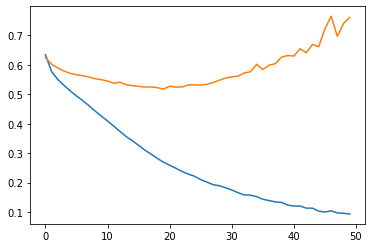

In [94]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

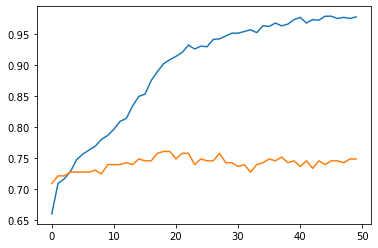

In [95]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [96]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.7609 - accuracy: 0.7485


[0.7609223127365112, 0.7484848499298096]

In [25]:
pred = model.predict(x_test)
len(pred)

340

In [26]:
pred

array([[0.07074302],
       [0.05716972],
       [0.05653619],
       [0.21051925],
       [0.22089422],
       [0.3055144 ],
       [0.43639383],
       [0.33585423],
       [0.3493175 ],
       [0.2683469 ],
       [0.39342633],
       [0.35436454],
       [0.31625697],
       [0.27236426],
       [0.26417443],
       [0.25536698],
       [0.27417424],
       [0.261223  ],
       [0.23732476],
       [0.46910927],
       [0.31575093],
       [0.29762203],
       [0.5004267 ],
       [0.42605877],
       [0.3481179 ],
       [0.33690247],
       [0.3112758 ],
       [0.28546563],
       [0.28070602],
       [0.22355118],
       [0.14140403],
       [0.12801506],
       [0.3502805 ],
       [0.48031437],
       [0.477077  ],
       [0.6073591 ],
       [0.7152999 ],
       [0.79735905],
       [0.7471494 ],
       [0.7932021 ],
       [0.8190497 ],
       [0.83938926],
       [0.8390756 ],
       [0.8021671 ],
       [0.8282277 ],
       [0.84161997],
       [0.5887556 ],
       [0.626

In [27]:
ans = []
for i in pred:
    ans.append(round(i[0]))

In [28]:
from collections import Counter
Counter(ans)

Counter({0: 196, 1: 144})

In [29]:
Counter(y_test)

Counter({0.0: 242, 1.0: 98})

## model2 :10일 10일

In [97]:
window_size = 10
target_period = 10

X = []
Y = []


for i in range(len(df_ct2) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct2.iloc[i+j,1:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct2.iloc[window_size+i+j,0] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 7:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)

In [98]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

In [99]:
x_train.shape

(1100, 10, 14)

In [100]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

In [101]:
with tf.device('/GPU:0'):
    model2 = Sequential()
    model2.add(LSTM(100, input_shape=(10,14)))
    model2.add(Dense(1,activation='sigmoid'))
    model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               46000     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________


In [102]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [103]:
model2.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [104]:
hist2 = model2.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 8ms/step - loss: 0.7128 - accuracy: 0.4900 - val_loss: 0.6484 - val_accuracy: 0.6886
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.6118 - accuracy: 0.6773 - val_loss: 0.6046 - val_accuracy: 0.7029
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5819 - accuracy: 0.7118 - val_loss: 0.5965 - val_accuracy: 0.6971
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5634 - accuracy: 0.7109 - val_loss: 0.5843 - val_accuracy: 0.6829
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5450 - accuracy: 0.7282 - val_loss: 0.5819 - val_accuracy: 0.6943
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5278 - accuracy: 0.7345 - val_loss: 0.5809 - val_accuracy: 0.7057
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5128 - accuracy: 0.7436 - val_loss: 0.5784 - val_accuracy: 0.7229
Epoch 

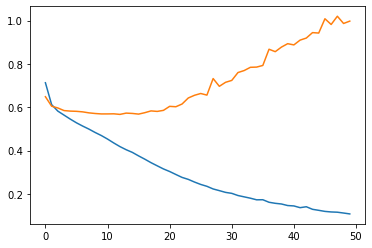

In [105]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])

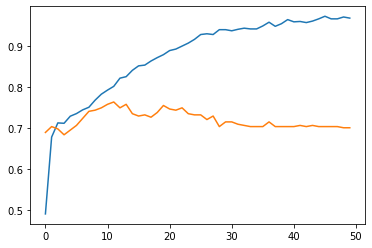

In [106]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])

In [107]:
model2.evaluate(x_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.9974 - accuracy: 0.7000


[0.9974156022071838, 0.699999988079071]

## model3 : 10일 5일

In [116]:
window_size = 10
target_period = 5

X = []
Y = []


for i in range(len(df_ct2) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct2.iloc[i+j,1:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct2.iloc[window_size+i+j,0] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 7:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)

In [117]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)
train_test_split = 1100

x_train = X_ary[:1100]
y_train = Y1_ary[:1100]

x_test = X_ary[1100:]
y_test = Y1_ary[1100:]

x_train.shape

(1100, 10, 14)

In [118]:
with tf.device('/GPU:0'):
    model3 = Sequential()
    model3.add(LSTM(100, input_shape=(10,14)))
    model3.add(Dense(1,activation='sigmoid'))
    model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100)               46000     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________


In [119]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [120]:
hist3 = model3.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
110/110 [==============================] - 2s 8ms/step - loss: 0.7480 - accuracy: 0.4764 - val_loss: 0.6324 - val_accuracy: 0.6113
Epoch 2/50
110/110 [==============================] - 1s 5ms/step - loss: 0.5059 - accuracy: 0.8000 - val_loss: 0.5136 - val_accuracy: 0.8282
Epoch 3/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4504 - accuracy: 0.8136 - val_loss: 0.4880 - val_accuracy: 0.8197
Epoch 4/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4345 - accuracy: 0.8209 - val_loss: 0.4802 - val_accuracy: 0.8197
Epoch 5/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4240 - accuracy: 0.8227 - val_loss: 0.4777 - val_accuracy: 0.8197
Epoch 6/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4148 - accuracy: 0.8227 - val_loss: 0.4755 - val_accuracy: 0.8197
Epoch 7/50
110/110 [==============================] - 1s 5ms/step - loss: 0.4065 - accuracy: 0.8318 - val_loss: 0.4770 - val_accuracy: 0.8197
Epoch 

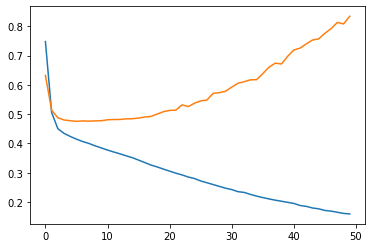

In [121]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])

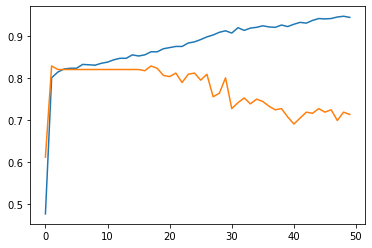

In [122]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])

In [123]:
model3.evaluate(x_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.8345 - accuracy: 0.7127


[0.8344676494598389, 0.7126760482788086]